<a href="https://colab.research.google.com/github/Jems-Chawin/Machine-Learning-Lab/blob/main/Lab3/Lab3_3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB 3 - PART 3 Classification**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import metrics
import pandas_datareader.data as web
from sklearn import model_selection
pd.options.display.float_format = '{:.3f}'.format

#### **Read csv file**

In [ ]:
### START CODE HERE ###
df = pd.read_csv('Coffee-modified.csv')
### END CODE HERE ###

Select only `['Total.Cup.Points', 'Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor',
         'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Moisture', 'altitude_mean_meters']`

In [ ]:
### START CODE HERE ###
select_cols = ['Total.Cup.Points', 'Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Moisture', 'altitude_mean_meters']
df = df.loc[:, select_cols]
### END CODE HERE ###
df

,Total.Cup.Points,Species,Country.of.Origin,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
0,90.580,Arabica,Ethiopia,Washed / Wet,8.670,8.830,8.670,8.750,8.500,8.420,10.000,0.120,2075.000
1,89.920,Arabica,Ethiopia,Washed / Wet,8.750,8.670,8.500,8.580,8.420,8.420,10.000,0.120,2075.000
2,89.750,Arabica,Guatemala,NaN,8.420,8.500,8.420,8.420,8.330,8.420,10.000,0.000,1700.000
3,89.000,Arabica,Ethiopia,Natural / Dry,8.170,8.580,8.420,8.420,8.500,8.250,10.000,0.110,2000.000
4,88.830,Arabica,Ethiopia,Washed / Wet,8.250,8.500,8.250,8.500,8.420,8.330,10.000,0.120,2075.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,68.330,Arabica,Mexico,Washed / Wet,7.080,6.830,6.250,7.420,7.250,6.750,10.000,0.110,900.000
1307,67.920,Arabica,Haiti,Natural / Dry,6.750,6.580,6.420,6.670,7.080,6.670,9.330,0.140,350.000
1308,63.080,Arabica,Nicaragua,Other,7.250,6.580,6.330,6.250,6.420,6.080,6.000,0.130,1100.000
1309,59.830,Arabica,Guatemala,Washed / Wet,7.500,6.670,6.670,7.670,7.330,6.670,8.000,0.100,1417.320


**Drop NA**


In [ ]:
### START CODE HERE ###
df.dropna(how='any', inplace=True)
### END CODE HERE ###
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1309
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Total.Cup.Points      1003 non-null   float64
 1   Species               1003 non-null   object 
 2   Country.of.Origin     1003 non-null   object 
 3   Processing.Method     1003 non-null   object 
 4   Aroma                 1003 non-null   float64
 5   Flavor                1003 non-null   float64
 6   Aftertaste            1003 non-null   float64
 7   Acidity               1003 non-null   float64
 8   Body                  1003 non-null   float64
 9   Balance               1003 non-null   float64
 10  Uniformity            1003 non-null   float64
 11  Moisture              1003 non-null   float64
 12  altitude_mean_meters  1003 non-null   float64
dtypes: float64(10), object(3)
memory usage: 109.7+ KB


,Total.Cup.Points,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
count,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000
mean,82.127,7.567,7.514,7.386,7.526,7.504,7.499,9.870,0.095,1816.792
std,2.632,0.301,0.324,0.333,0.308,0.273,0.341,0.445,0.043,9112.473
min,59.830,5.080,6.170,6.170,5.250,6.330,6.080,6.000,0.000,1.000
25%,81.170,7.420,7.330,7.170,7.330,7.330,7.330,10.000,0.100,1100.000
50%,82.420,7.580,7.500,7.420,7.500,7.500,7.500,10.000,0.110,1310.640
75%,83.580,7.750,7.670,7.580,7.670,7.670,7.670,10.000,0.120,1600.000
max,90.580,8.750,8.830,8.670,8.750,8.500,8.580,10.000,0.170,190164.000


Let's `Y` be  `Total.Cup.Points` and X be the rest except in  `Y`.

In [ ]:
### START CODE HERE ###
cols = ['Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Moisture', 'altitude_mean_meters']
Y = df.loc[:, ['Total.Cup.Points']]
X = df.loc[:, cols]

### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- X : `['Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor','Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Moisture','altitude_mean_meters']`
- Y : `['Total.Cup.Points']`

</details>

In [ ]:
print(X.columns)
print(Y.columns)

Index(['Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor',
       'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Moisture',
       'altitude_mean_meters'],
      dtype='object')
Index(['Total.Cup.Points'], dtype='object')


**Labeling Bean_grade value using percentile**

- Bean_grade = 1 ; `if Y < rating_pctile[0] 75 percentile`
- Bean_grade = 2 ; `if rating_pctile[0] <= Y < rating_pctile[1] 90 percentile`
- Bean_grade = 3 ; `if Y >= rating_pctile[1]`


In [ ]:
### START CODE HERE ###
percentiles = df['Total.Cup.Points'].quantile([.75, .9]).tolist()
def labeling_grade(row):
  if row['Total.Cup.Points'] < percentiles[0]:
    return 1
  elif row['Total.Cup.Points'] < percentiles[1]:
    return 2
  else:
    return 3
df['Bean_grade'] = df.apply(labeling_grade, axis=1)
df = df.reindex(columns=(['Bean_grade'] + select_cols))
### END CODE HERE ###
df

,Bean_grade,Total.Cup.Points,Species,Country.of.Origin,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
0,3,90.580,Arabica,Ethiopia,Washed / Wet,8.670,8.830,8.670,8.750,8.500,8.420,10.000,0.120,2075.000
1,3,89.920,Arabica,Ethiopia,Washed / Wet,8.750,8.670,8.500,8.580,8.420,8.420,10.000,0.120,2075.000
3,3,89.000,Arabica,Ethiopia,Natural / Dry,8.170,8.580,8.420,8.420,8.500,8.250,10.000,0.110,2000.000
4,3,88.830,Arabica,Ethiopia,Washed / Wet,8.250,8.500,8.250,8.500,8.420,8.330,10.000,0.120,2075.000
9,3,88.250,Arabica,Ethiopia,Natural / Dry,8.080,8.580,8.500,8.500,7.670,8.420,10.000,0.100,1822.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,1,69.170,Arabica,Honduras,Washed / Wet,7.000,6.330,6.170,6.500,6.670,6.170,8.000,0.100,1450.000
1306,1,68.330,Arabica,Mexico,Washed / Wet,7.080,6.830,6.250,7.420,7.250,6.750,10.000,0.110,900.000
1307,1,67.920,Arabica,Haiti,Natural / Dry,6.750,6.580,6.420,6.670,7.080,6.670,9.330,0.140,350.000
1308,1,63.080,Arabica,Nicaragua,Other,7.250,6.580,6.330,6.250,6.420,6.080,6.000,0.130,1100.000


**Plot Bar graph that show count of each `Bean_grade`.**

Text(0, 0.5, 'Count')

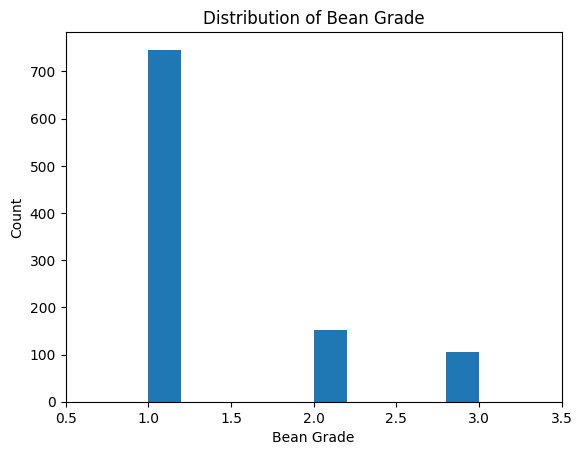

In [ ]:
### START CODE HERE ###
plt.hist(df['Bean_grade'])
plt.xlim(0.5,3.5)
plt.title('Distribution of Bean Grade')
plt.xlabel('Bean Grade')
plt.ylabel('Count')
### END CODE HERE ###

**Standardize X's numeric data**

In [ ]:
numeric_cols = X.select_dtypes(include=[np.number]).columns
sc = preprocessing.StandardScaler()
X[numeric_cols] = sc.fit_transform(X[numeric_cols])
X

,Species,Country.of.Origin,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
0,Arabica,Ethiopia,Washed / Wet,3.660,4.058,3.862,3.978,3.651,2.703,0.292,0.576,0.028
1,Arabica,Ethiopia,Washed / Wet,3.926,3.565,3.351,3.425,3.358,2.703,0.292,0.576,0.028
3,Arabica,Ethiopia,Natural / Dry,2.000,3.288,3.110,2.905,3.651,2.204,0.292,0.346,0.020
4,Arabica,Ethiopia,Washed / Wet,2.266,3.041,2.599,3.165,3.358,2.439,0.292,0.576,0.028
9,Arabica,Ethiopia,Natural / Dry,1.702,3.288,3.351,3.165,0.608,2.703,0.292,0.115,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,Arabica,Honduras,Washed / Wet,-1.884,-3.650,-3.655,-3.335,-3.059,-3.902,-4.201,0.115,-0.040
1306,Arabica,Mexico,Washed / Wet,-1.618,-2.108,-3.415,-0.345,-0.933,-2.200,0.292,0.346,-0.101
1307,Arabica,Haiti,Natural / Dry,-2.714,-2.879,-2.904,-2.783,-1.556,-2.435,-1.214,1.036,-0.161
1308,Arabica,Nicaragua,Other,-1.054,-2.879,-3.174,-4.148,-3.976,-4.167,-8.694,0.806,-0.079


**Drop the columns that have correlation more than 0.8.**

In [ ]:
### START CODE HERE ###
correlation_matrix = X.corr()
# Find columns with correlation greater than 0.8
highly_correlated_cols = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            highly_correlated_cols.add(colname)
X_filtered = X.drop(columns=highly_correlated_cols)
dropped_columns = set(X.columns) - set(X_filtered.columns)
print("Dropped Columns:", dropped_columns)
### END CODE HERE ###

Dropped Columns: {'Aftertaste'}


<ipython-input-10-5591d5a092b0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X.corr()


**One hot encode non-numeric columns**
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `pd.get_dummies()`
</details>

In [ ]:
### START CODE HERE ###
non_num_cols = X.select_dtypes(exclude=[np.number]).columns
X = pd.get_dummies(X, columns=non_num_cols)
### END CODE HERE ###
X

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters,Species_Arabica,...,Country.of.Origin_Uganda,Country.of.Origin_United States,Country.of.Origin_United States (Puerto Rico),Country.of.Origin_Vietnam,Country.of.Origin_Zambia,Processing.Method_Natural / Dry,Processing.Method_Other,Processing.Method_Pulped natural / honey,Processing.Method_Semi-washed / Semi-pulped,Processing.Method_Washed / Wet
0,3.660,4.058,3.862,3.978,3.651,2.703,0.292,0.576,0.028,1,...,0,0,0,0,0,0,0,0,0,1
1,3.926,3.565,3.351,3.425,3.358,2.703,0.292,0.576,0.028,1,...,0,0,0,0,0,0,0,0,0,1
3,2.000,3.288,3.110,2.905,3.651,2.204,0.292,0.346,0.020,1,...,0,0,0,0,0,1,0,0,0,0
4,2.266,3.041,2.599,3.165,3.358,2.439,0.292,0.576,0.028,1,...,0,0,0,0,0,0,0,0,0,1
9,1.702,3.288,3.351,3.165,0.608,2.703,0.292,0.115,0.001,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,-1.884,-3.650,-3.655,-3.335,-3.059,-3.902,-4.201,0.115,-0.040,1,...,0,0,0,0,0,0,0,0,0,1
1306,-1.618,-2.108,-3.415,-0.345,-0.933,-2.200,0.292,0.346,-0.101,1,...,0,0,0,0,0,0,0,0,0,1
1307,-2.714,-2.879,-2.904,-2.783,-1.556,-2.435,-1.214,1.036,-0.161,1,...,0,0,0,0,0,1,0,0,0,0
1308,-1.054,-2.879,-3.174,-4.148,-3.976,-4.167,-8.694,0.806,-0.079,1,...,0,0,0,0,0,0,1,0,0,0


**Split the training set into 70% for training and the remaining 30% for the test set.**

In [ ]:
### START CODE HERE ###
Y = df.loc[:, ['Bean_grade']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
### START CODE HERE ###

### **Grid Search**
**Initialize models and Search Space**
- `Support Vector Machine`


Utilize the search space as provided by the Lab direction.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `SVC()`
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
- `SVM: {'kernel': ['linear', 'rbf', 'poly'], 'C': [10, 100], 'gamma': [0.01, 0.1], 'degree': [2, 3]}`

</details>

In [ ]:
### START CODE HERE ###
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc_parameters_grid = {'kernel': ['linear', 'rbf', 'poly'],
                       'C': [0.1, 1, 10],
                       'gamma': [0.01, 0.1, 1],
                       'degree': [2, 3]}
svc_model = SVC()
### END CODE HERE ###

Perform the grid search and print out the best parameter set along with the corresponding best score for all models. Subsequently, print the mean and standard deviation of the scores for all parameter sets within the grid search space for each model.
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `GridSearchCV()`
</details>


In [ ]:
### START CODE HERE ###
grid_search_svc = GridSearchCV(svc_model, svc_parameters_grid, cv=3)
grid_search_svc.fit(X_train, y_train)
print("SVC best params:", grid_search_svc.best_params_)
print("SVC best score:", grid_search_svc.best_score_)
print("SVC score mean:", grid_search_svc.cv_results_['mean_test_score'].mean())
print("SVC score std:", grid_search_svc.cv_results_['mean_test_score'].std())
### END CODE HERE ###

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

SVC best params: {'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel': 'linear'}
SVC best score: 0.9131054131054132
SVC score mean: 0.8595019520945445
SVC score std: 0.05712712916192894


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Utilize the best parameters obtained from random search to create a SVM model. Compare the predicted values of the model with those in the Y_test DataFrame, create a function to calculate the confusion matrix the precision, recall, F1-Score, support of each output class, and model accuracy.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
- Confusion Matrix:
 [[216   7   1]
 [  9  33   4]
 [  0   6  25]]
   Precision  Recall  F1-Score  Support
0      0.960   0.964     0.962      224
1      0.717   0.717     0.717       46
2      0.833   0.806     0.820       31

Accuracy:  0.9102990033222591
```

</details>

In [ ]:
### START CODE HERE ###
from sklearn.metrics import confusion_matrix, classification_report
svc_best_params = grid_search_svc.best_params_
svc_best = SVC(**svc_best_params)
svc_best.fit(X_train, y_train)
svc_preds = svc_best.predict(X_test)
print(confusion_matrix(y_test, svc_preds))
print(classification_report(y_test, svc_preds))
print("Accuracy:", metrics.accuracy_score(y_test, svc_preds))
### END CODE HERE ###

[[209   1   1]
 [  7  45   2]
 [  0   6  30]]
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       211
           2       0.87      0.83      0.85        54
           3       0.91      0.83      0.87        36

    accuracy                           0.94       301
   macro avg       0.91      0.89      0.90       301
weighted avg       0.94      0.94      0.94       301

Accuracy: 0.9435215946843853


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Select 4 pairs of features then polt the decision boundary.**
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html
- For plotting the decision boundary, select features X with a correlation to Y greater than 0.5. This ensures that the decision boundary will depict all three classes.


In [ ]:
### START CODE HERE ###
correlation_matrix = X[numeric_cols].corr()
# Find columns with correlation greater than 0.5
highly_correlated_cols = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            colname = correlation_matrix.columns[i]
            highly_correlated_cols.add(colname)
highly_correlated_cols = list(highly_correlated_cols)
print(highly_correlated_cols)
### END CODE HERE ####

['Body', 'Acidity', 'Flavor', 'Aftertaste', 'Balance']


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
<ipython-input-22-ff3b2ae7c0ea>:32: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8, linewidths=0.5)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
 

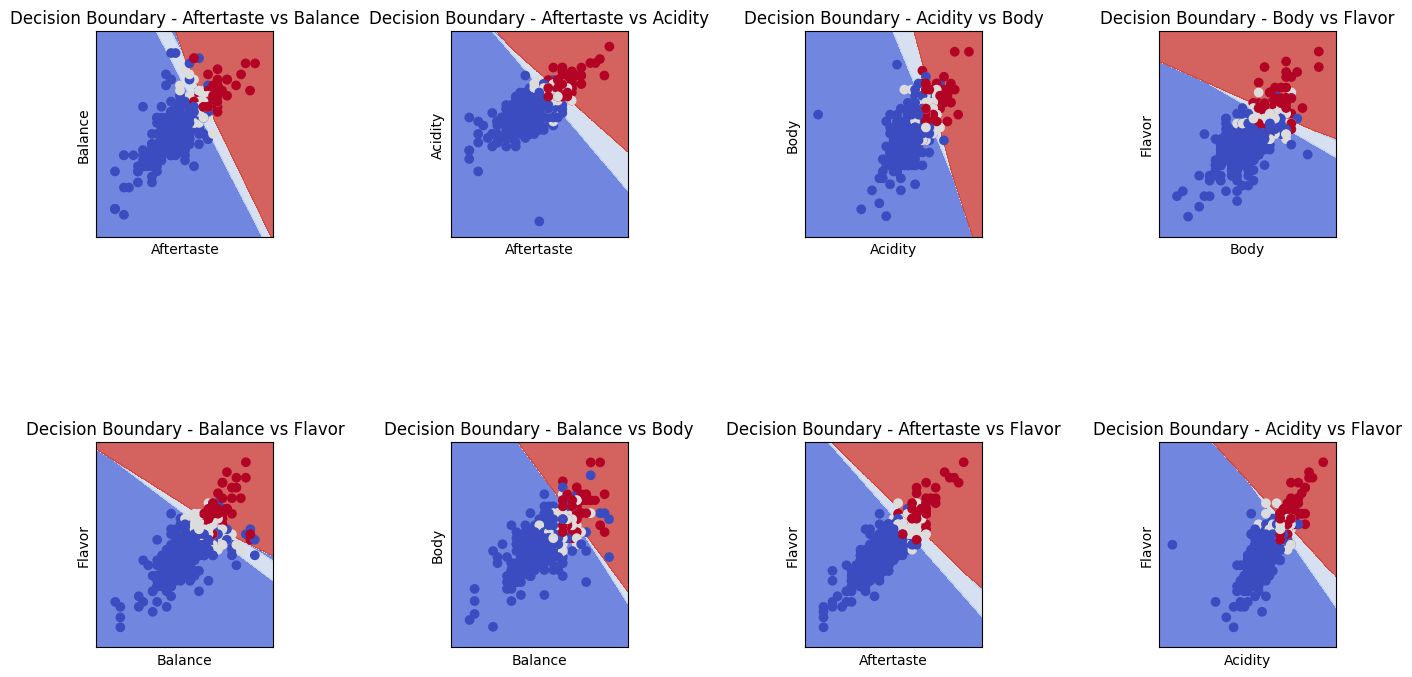

In [ ]:
highly_correlated_cols_pairs = [['Aftertaste','Balance'],['Aftertaste','Acidity'],['Acidity','Body'],['Body','Flavor'],
 ['Balance','Flavor'],['Balance','Body'],['Aftertaste','Flavor'],['Acidity','Flavor']]

i = 0
svc_best_params = grid_search_svc.best_params_
plt.figure(figsize=(16, 8))
for pair in highly_correlated_cols_pairs:
  X = X_train.loc[:,pair]
  y = y_train

  h = .02  # step size in the mesh

  svc_best = SVC(**svc_best_params)
  svc_best.fit(X,y)

  # create a mesh to plot in
  x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
  y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

  clf = svc_best
  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  plt.subplot(2, 4, i + 1)
  plt.subplots_adjust(wspace=1, hspace=1)

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8, linewidths=0.5)

  # Plot also the training points
  plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y.values, cmap=plt.cm.coolwarm)
  plt.xlabel(pair[0])
  plt.ylabel(pair[1])
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title(f"Decision Boundary - {pair[0]} vs {pair[1]}")
  i += 1

plt.show()

### **Random Search**
**Initialize models and Search Space**
- `Support Vector Machine`

Utilize the search space as provided by the Lab direction.
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `SVC()`
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
- `SVM: {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 37.575, 75.05, 112.525, 150.0], 'gamma': [0.01, 0.0325, 0.05500000000000001, 0.0775, 0.1], 'degree': [2, 3]}`

</details>

In [ ]:
### START CODE HERE ###
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
svc_parameters_random = {'kernel': ['linear', 'rbf', 'poly'],
                         'C': [0.1, 10],
                         'gamma': [0.1, 10],
                         'degree': [2, 3]}
svc_model = SVC()
### END CODE HERE ###

Perform the random search and print out the best parameter set along with the corresponding best score for all models. Subsequently, print the mean and standard deviation of the scores for all parameter sets within the random search space for each model.

In [ ]:
### START CODE HERE ###
random_search_svc = RandomizedSearchCV(svc_model, svc_parameters_random, cv=5)
random_search_svc.fit(X_train, y_train)
print("SVC best params:", random_search_svc.best_params_)
print("SVC best score:", random_search_svc.best_score_)
print("SVC score mean:", random_search_svc.cv_results_['mean_test_score'].mean())
print("SVC score std:", random_search_svc.cv_results_['mean_test_score'].std())
### END CODE HERE ###

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

SVC best params: {'kernel': 'linear', 'gamma': 0.1, 'degree': 3, 'C': 10}
SVC best score: 0.9173758865248228
SVC score mean: 0.8752178318135766
SVC score std: 0.053853949368056576


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Utilize the best parameters obtained from random search to create a SVM model. Compare the predicted values of the model with those in the Y_test DataFrame, calculate the confusion matrix the precision, recall, F1-Score, support of each output class, and model accuracy.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
- Confusion Matrix:
 [[217   6   1]
 [ 11   32   3]
 [  0    5  26]]
   Precision  Recall  F1-Score  Support
0      0.952   0.969     0.960      224
1      0.744   0.696     0.719       46
2      0.867   0.839     0.852       31

Accuracy:  0.9136212624584718
```

</details>


In [ ]:
### START CODE HERE ###
from sklearn.metrics import confusion_matrix, classification_report
svc_best_params = random_search_svc.best_params_
svc_best = SVC(**svc_best_params)
svc_best.fit(X_train, y_train)
svc_preds = svc_best.predict(X_test)
print(confusion_matrix(y_test, svc_preds))
print(classification_report(y_test, svc_preds))
print("Accuracy:", metrics.accuracy_score(y_test, svc_preds))
### START CODE HERE ###

[[206   4   1]
 [  4  48   2]
 [  0   6  30]]
              precision    recall  f1-score   support

           1       0.98      0.98      0.98       211
           2       0.83      0.89      0.86        54
           3       0.91      0.83      0.87        36

    accuracy                           0.94       301
   macro avg       0.91      0.90      0.90       301
weighted avg       0.94      0.94      0.94       301

Accuracy: 0.9435215946843853


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Select 4 pairs of features then polt the decision boundary.**
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html
- For plotting the decision boundary, select features X with a correlation to Y greater than 0.5. This ensures that the decision boundary will depict all three classes.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
<ipython-input-23-3466df5aad06>:33: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8, linewidths=0.5)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
 

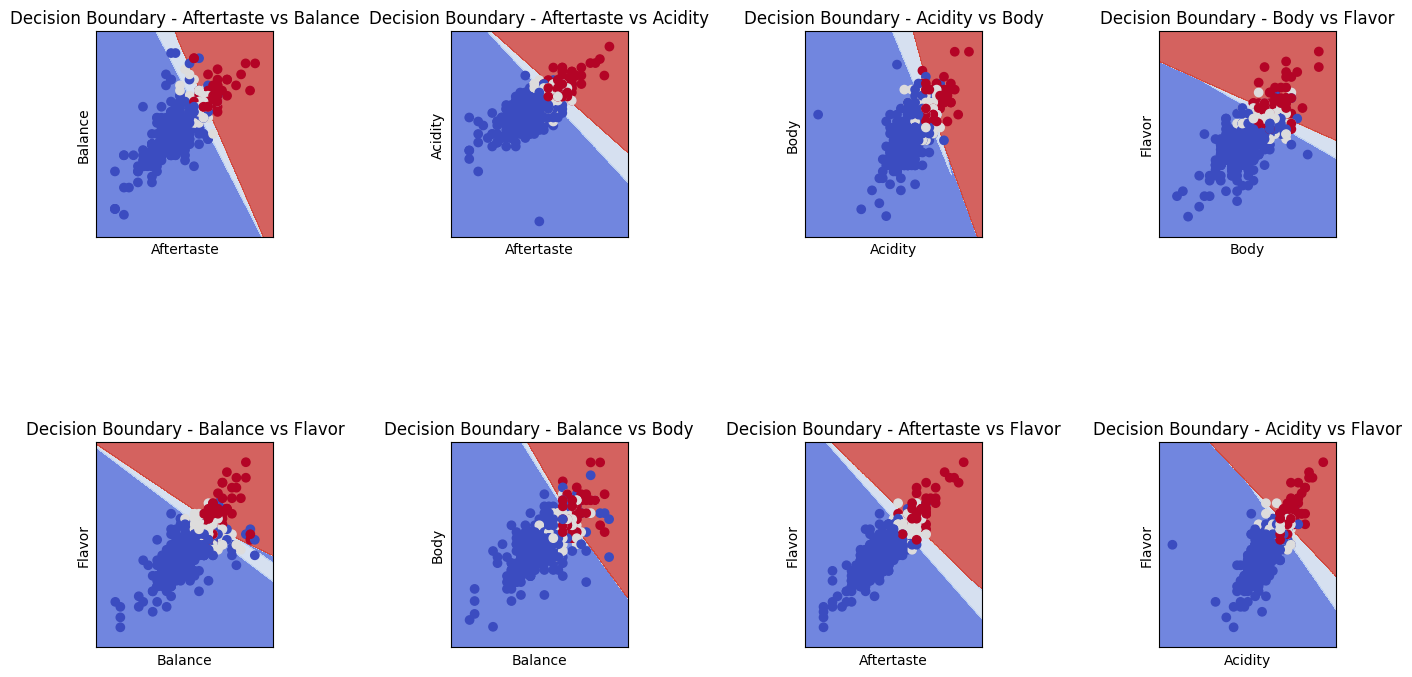

In [ ]:
### START CODE HERE ###
highly_correlated_cols_pairs = [['Aftertaste','Balance'],['Aftertaste','Acidity'],['Acidity','Body'],['Body','Flavor'],
 ['Balance','Flavor'],['Balance','Body'],['Aftertaste','Flavor'],['Acidity','Flavor']]

i = 0
svc_best_params = random_search_svc.best_params_
plt.figure(figsize=(16, 8))
for pair in highly_correlated_cols_pairs:
  X = X_train.loc[:,pair]
  y = y_train

  h = .02  # step size in the mesh

  svc_best = SVC(**svc_best_params)
  svc_best.fit(X,y)

  # create a mesh to plot in
  x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
  y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

  clf = svc_best
  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  plt.subplot(2, 4, i + 1)
  plt.subplots_adjust(wspace=1, hspace=1)

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8, linewidths=0.5)

  # Plot also the training points
  plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y.values, cmap=plt.cm.coolwarm)
  plt.xlabel(pair[0])
  plt.ylabel(pair[1])
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title(f"Decision Boundary - {pair[0]} vs {pair[1]}")
  i += 1

plt.show()
### START CODE HERE ###

### Question
1. The dropped feature columns with corr > 0.8 are correlated to which columns?
2. Compare the top 3 best model parameters from gridsearchCV() and randomizedsearchcv(), are they different? Explain.
3. Choose a combination of model parameters that yield the highest standard deviation in cross-validation scores. Enumerate the scores for each cross-validation iteration and provide an explanation for the potential reasons behind the observed variations.
4. Show correlation values between Y output and each X input and how the top 2 highest and 2 lowest correlation of the pair Y and each X related to the decision boundary of 3 class output?